# [Lab Session 3](fourier.ipynb)


In [148]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize

**[Task 1 (a).]()** Load the first image, resize it to (256, 256) and display it.


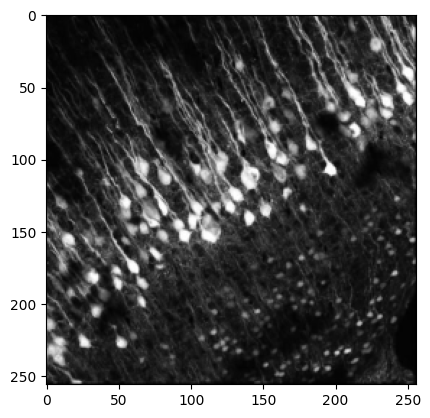

In [149]:
cell_img = plt.imread('data/cells.png')
cell_img = resize(cell_img, (256, 256))
plt.imshow(cell_img, cmap='gray')

**[Task 1 (b).]()** Apply the fast Fourier transform and check the data type of the result.


In [150]:
cell_ft = np.fft.fft2(cell_img)
cell_ft.dtype

dtype('complex128')

**[Task 1 (c).]()** Extract the phase and amplitude and display them.


In [151]:
cell_amplitude = np.abs(cell_ft)
cell_phase = np.angle(cell_ft)


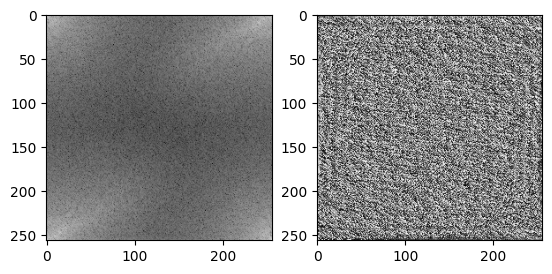

In [152]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(cell_amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(cell_phase, 'gray')

**[Task 1 (d).]()** Do a shift so that zero is displayed in the center of the image and show amplitude and phase again.


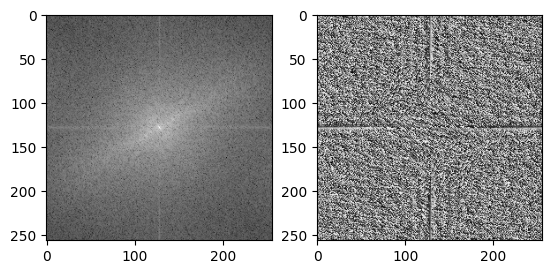

In [153]:
cell_shifted_amplitude = np.fft.fftshift(cell_amplitude)
cell_shifted_phase = np.fft.fftshift(cell_phase)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(cell_shifted_amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(cell_shifted_phase, 'gray')   


**[Task 1 (e).]()** Apply the inverse FFT and display the restored image.


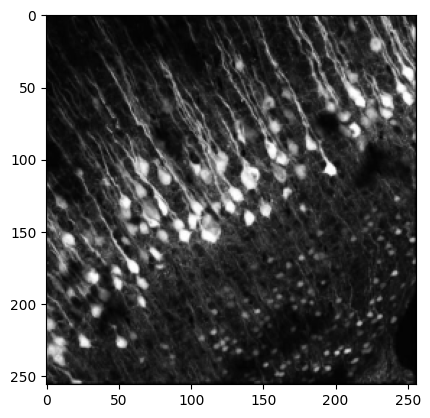

In [154]:
reconstructed_img = np.fft.ifft2(cell_ft)
plt.imshow(np.abs(reconstructed_img), cmap='gray')

---


**[Task 2 (a).]()** Load the brain MR image.


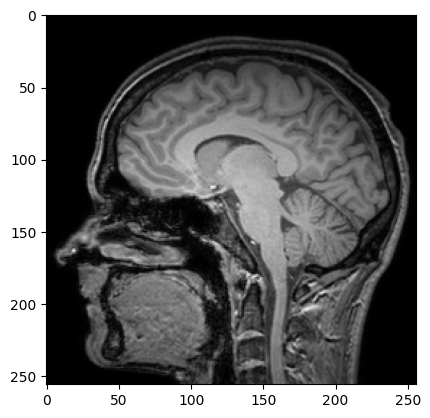

In [155]:
brain_img = plt.imread('data/brain_mri.png')
plt.imshow(brain_img, cmap='gray')

**[Task 2 (b).]()** Apply the FFT, do a shift, extract amplitude and phase.


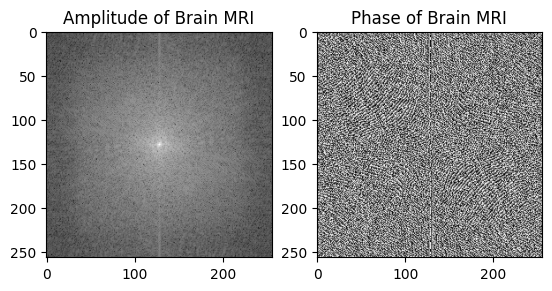

In [156]:

brain_ft = np.fft.fft2(brain_img)

shifted_brain_ft = np.fft.fftshift(brain_ft)

brain_amplitude = np.abs(shifted_brain_ft)
brain_phase = np.angle(shifted_brain_ft)
plt.figure()
plt.subplot(1, 2, 1)
plt.title('Amplitude of Brain MRI')
plt.imshow(np.log(brain_amplitude), 'gray',)
plt.subplot(1, 2, 2)
plt.title('Phase of Brain MRI')
plt.imshow(brain_phase, 'gray',)



In [157]:
def to_complex_array(amplitude_array, phase_array):
    return amplitude_array * np.exp(1j * phase_array)

**[Task 2 (c).]()** Merge the amplitude of the brain MR image and the phase of cell image. Do the IFFT and display the resulting image.


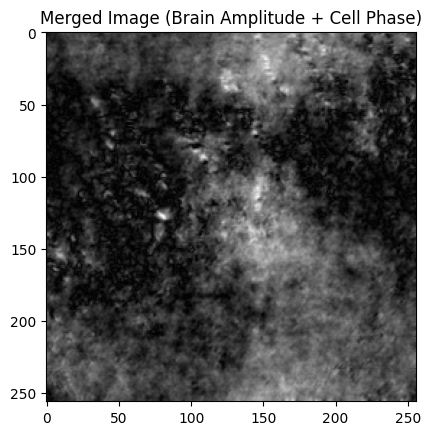

In [158]:
amplitudeBrain_phaseCell = to_complex_array(brain_shifted_amplitude, cell_shifted_phase)
shifted_amplitudeBrain_phaseCell = np.fft.ifftshift(amplitudeBrain_phaseCell)
merged_img = np.fft.ifft2(shifted_amplitudeBrain_phaseCell)

plt.title('Merged Image (Brain Amplitude + Cell Phase)')
plt.imshow(np.abs(merged_img), cmap='gray')






**[Task 2 (d).]()** Repeat this with the amplitude of the cells and the phase of the brain.


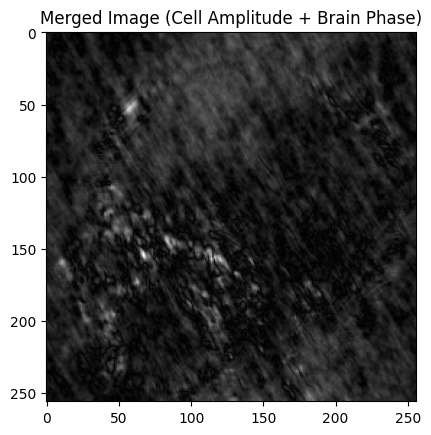

In [159]:
#merge amplitude of cell image with phase of brain MRI. do the inverse fourier transform and display the result
merged_ft2 = to_complex_array(cell_amplitude, brain_phase)
merged_shifted_ft2 = np.fft.ifftshift(merged_ft2)
merged_img2 = np.fft.ifft2(merged_shifted_ft2)
plt.title('Merged Image (Cell Amplitude + Brain Phase)')
plt.imshow(np.abs(merged_img2), cmap='gray')       

---


**[Task 3 (a).]()** Create a lowpass filter mask.


In [160]:
filter_window_size = 50

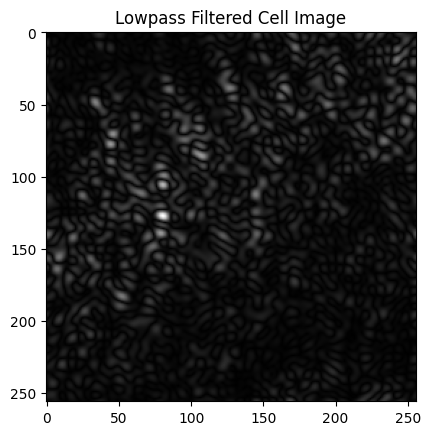

In [163]:
#create a lowpass filter mask
rows, cols = cell_img.shape
crow, ccol = rows // 2 , cols // 2
lowpass_mask = np.zeros((rows, cols), np.uint8)
lowpass_mask[crow - filter_window_size // 2:crow + filter_window_size //
2, ccol - filter_window_size // 2:ccol + filter_window_size // 2] = 1
filtered_cell_ft = cell_ft * lowpass_mask
filtered_cell_img = np.fft.ifft2(filtered_cell_ft)
plt.title('Lowpass Filtered Cell Image')
plt.imshow(np.abs(filtered_cell_img), cmap='gray')



**[Task 3 (b).]()** Create a highpass filter maks.


**[Task 3 (c).]()** Apply the lowpass and highpass filter mask to the amplitude of the brain and display the results.


**[Task 3 (d).]()** Apply the mask to the amplitude, merge the result with the phase and restore the image.


---


**[Task 4 (a).]()** Implement a function that computes the 2D-DFT.


**[Task 4 (b).]()** Implement a function that computes the 2D-IDFT.


Due to high computational costs, we need to resize the image.


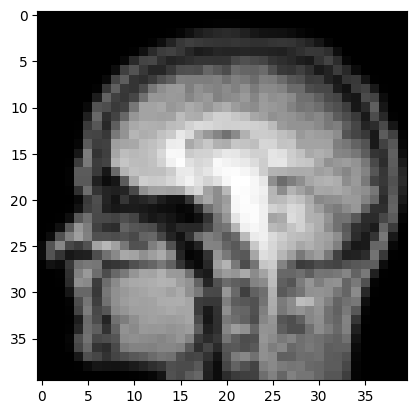

In [161]:
test_img = resize(brain_img, (40, 40))
plt.imshow(test_img, 'gray')

**[Task 4 (c).]()** Apply your DFT implementation to the image and display amplitude and phase.


**[Task 4 (d).]()** Reconstruct the image using your IDFT implementation and display it.


**[Task 4 (e).]()** Compare your result to the result of numpy's FFT


**[Task 4 (f).]()** Round the arrays and compare them again.


**[Task 4 (g).]()** Compare the run times of the two algorithms (your DFT and numpy's FFT)
